In [1]:
import networkx as nx
from sqw.tesselations import even_cycle_two_tesselation, square_grid_tesselation
from sqw.plots import tesselation_plot, square_grid_plot
from sqw.states import uniform_initial_state, amp2prob
import matplotlib.pyplot as plt
import numpy as np
from sqw.experiments_expanded import running
from sqw.plots import (final_distribution_plot, 
                       mean_plot, 
                       std_plot, 
                       ipr_plot, 
                       survival_plot)

import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

# graph -- matrix representation (adj, lapl, grover) -- tesselation 

In [99]:
start = time.time()

n = 3
N = 2 * n
steps = 2

A = nx.adjacency_matrix(nx.grid_graph(dim = (N, N)))
G = nx.from_numpy_array(A)
T = square_grid_tesselation(N, periodic = False)

angles = [[np.pi/3, np.pi/3,np.pi/3, np.pi/3]] * steps
tesselation_order = [[1,2,0,3] for x in range(steps)]
initial_state = uniform_initial_state(N**2, nodes = [N**2//2 + N//2])

states_ua_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

end = time.time()
print(end-start)

0.043702125549316406


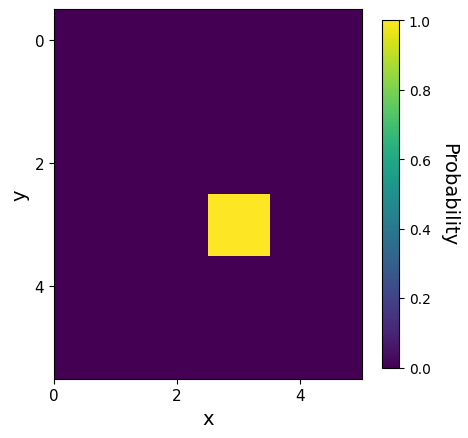

In [100]:
final_distribution = amp2prob(states_ua_ut[0])
square_grid_plot(final_distribution,N)

#### Searching

In [274]:
start = time.time()

n = 8
N = 2 * n
steps = 150

gamma = 0.5
A = nx.adjacency_matrix(nx.grid_graph(dim = (N, N)))

A = A + gamma * np.eye(N**2)


G = nx.from_numpy_array(A)
T = square_grid_tesselation(N, periodic = True)

theta = .95
theta = np.pi/3.96
angles = [[theta]*4] * steps
tesselation_order = [[1,0,3,2] for x in range(steps)]
initial_state = uniform_initial_state(N**2, nodes = range(0, N**2))

states_ua_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order,
                 searching = [0],matrix_representation = 'adjacency')

end = time.time()
print(end-start)

3.251004934310913


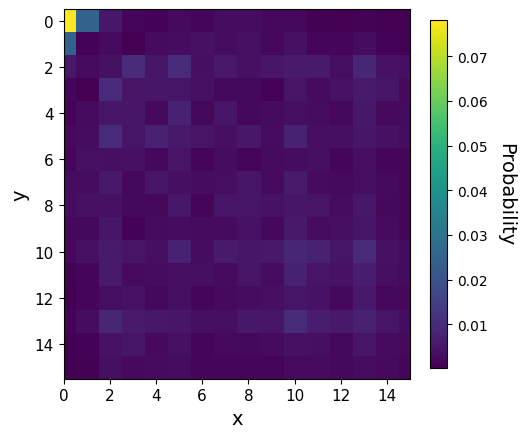

In [275]:
final_distribution = amp2prob(states_ua_ut[50])
square_grid_plot(final_distribution,N)

In [276]:
searching_prob =[float(amp2prob(v)[0]) for v in states_ua_ut]

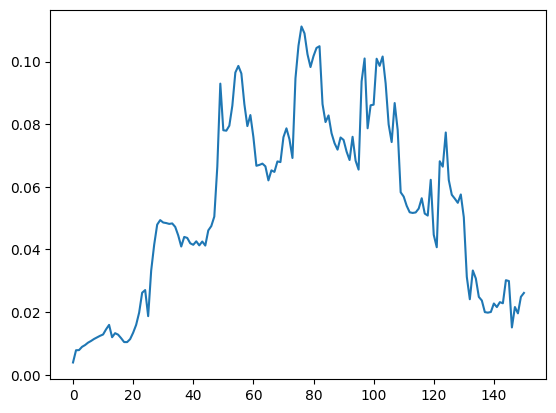

In [277]:
plt.plot(searching_prob)
plt.show()